In [67]:
import os
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt

from fastai.vision import *

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# 投影法
使用投影法对字符串进行分割

In [3]:
def get_vertical_hist(src):
    # vertical projection histogram
    # input binary np array
    binary = (src == 255)
    hist = np.sum(binary, axis=0)
    return hist

# 图片ROI切割
切割出8个子图

In [4]:
def get_all_images(src):
    # Single image size: 66x66 px
    # gap between every image 5px
    # top left image point (5, 41)
    
    sub1 = img[41:41 + 66, 5 + 72*0:5 + 72*0 + 66]
    sub2 = img[41:41 + 66, 5 + 72*1:5 + 72*1 + 66]
    sub3 = img[41:41 + 66, 5 + 72*2:5 + 72*2 + 66]
    sub4 = img[41:41 + 66, 5 + 72*3:5 + 72*3 + 66]
    sub5 = img[113:113 + 66, 5 + 72*0:5 + 72*0 + 66]
    sub6 = img[113:113 + 66, 5 + 72*1:5 + 72*1 + 66]
    sub7 = img[113:113 + 66, 5 + 72*2:5 + 72*2 + 66]
    sub8 = img[113:113 + 66, 5 + 72*3:5 + 72*3 + 66]
    
    return sub1, sub2, sub3, sub4, sub5, sub6, sub7, sub8

# 切割字符
当查找次数过多时会出现两个标签一起选择的情况

### 针对单个标签和多个标签分别进行切割
1. 单个标签的字符背景为浅色
2. 两个标签的字符背景为深色

根据二值化后的取值进行判断

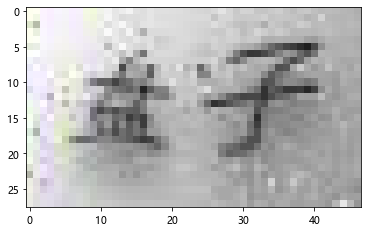

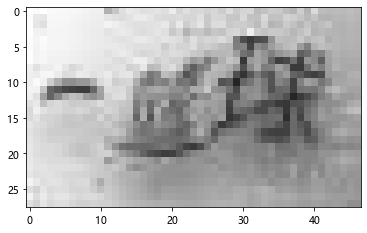

In [78]:
def get_char_images(src):
    # char img start (118, 0) (118, 28) length:29
    # two types : one vocab with light background
    #             two vocabs with dark background
    ch_img = src[0:28, 118:290]
    binary = cv2.cvtColor(ch_img, cv2.COLOR_BGR2GRAY)
    thresh, binary = cv2.threshold(binary,120, 255,
                                   cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    # print(binary.sum())
    # single vocal
    if (binary.sum() <= 200000):
        hist = get_vertical_hist(binary)
        for i in range(len(hist)-1, 0, -1):
            if hist[i] != 0:
                out = ch_img[0:28, 0:i]
                break
    else:
        k = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 3))
        binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, k)
        plt.imshow(binary)
        hist = get_vertical_hist(binary)
        split = []
        for i in range(len(hist)-1, 0, -1):
            if hist[i] == 0 and hist[i-1] != 0:
                split.append(i)
        # print(split)
        try:
            assert len(split) == 2
            c1 = ch_img[0:28, 0: split[1]]
            c2 = ch_img[0:28, split[1]: split[0]]
        except:
            c1 = ch_img[0:28, 0: split[-1]]
            c2 = ch_img[0:28, split[-1]: split[0]]
        out = [c1, c2]
    return out
    
out = get_char_images(img)
plt.imshow(out[0]); plt.figure(); plt.imshow(out[1])

In [99]:
dual_path = Path('/data/12306/pure_img/train_data_2/')
save_path = Path('/data/12306/chars/')

In [100]:
i = 60
for im_path in dual_path.ls():
    img = cv2.imread(str(im_path))
    out = get_char_images(img)
    try :
        assert len(out) == 2
        cv2.imwrite(f'{save_path}/{i}.jpg', out[1])
        i += 1
        cv2.imwrite(f'{save_path}/{i}.jpg', out[0])
        i += 1
    except:
        cv2.imwrite(f'{save_path}/{i}.jpg', out)
        i += 1
    if i == 5000:
        break



In [91]:
dual_path.ls()[0].stem

'badd1b70-edda-457b-8a4c-fc84c715856a'

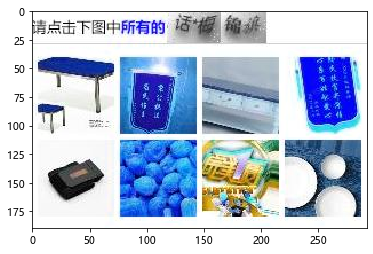

In [57]:
plt.imshow(img)